In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image

# data example = canada imigration data
df_can = pd.read_excel("./Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20))
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_can.drop(["AREA",'REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName': 'Continent','RegName':'Region'}, inplace=True)


In [18]:
df_can2=df_can.set_index(['Country'])
df_can2["Total"] = df_can2.sum(axis=1)
years=range(1980,2014)
df_dsn=df_can2.loc[['Denmark','Sweden','Norway'],years]
df_dsn["Total"] = df_dsn.sum(axis=1)
df_dsn.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,62,101,97,108,81,92,93,94,81,3901
Sweden,281,308,222,176,128,158,187,198,171,182,...,205,139,193,165,167,159,134,140,140,5866
Norway,116,77,106,51,31,54,56,80,73,76,...,57,53,73,66,75,46,49,53,59,2327


In [ ]:
# Contoh menghitung nilai kuadrat menggunakan lambda
nilai = [2,3,4,5,6] 

In [27]:
kuadrat_nilai = [(n ** 2) for n in nilai]
kuadrat_nilai

[4, 9, 16, 25, 36]

In [31]:
# Word Cloud
from wordcloud import WordCloud, STOPWORDS

In [32]:
alice_novel = open("alice_novel.txt", "r").read()
stop_words = set(STOPWORDS)

alice_word_count_generator = WordCloud(
    background_color="white",
    max_words=1000,
    stopwords=stop_words
)

alice_novel
alice_word_count_generator.generate(alice_novel)
alice_word_count_generator

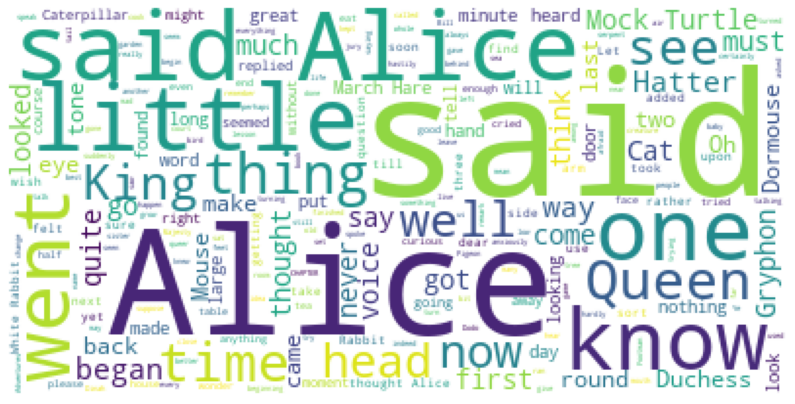

In [33]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

#display the cloud
plt.imshow(alice_word_count_generator)
plt.axis("off")
plt.show()


 ##  Seaborn

In [34]:
data_years = df_can2[years]
data_years

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217
Zambia,11,17,11,7,16,9,15,23,44,68,...,56,91,77,71,64,60,102,69,46,59
Zimbabwe,72,114,102,44,32,29,43,68,99,187,...,1450,615,454,663,611,508,494,434,437,407


In [35]:
df_total_year = pd.DataFrame(data_years.sum(axis=0))
df_total_year

,0
1980,286274
1981,257282
1982,242350
1983,178370
1984,176544
1985,168692
1986,198702
1987,304150
1988,323170
1989,383100


In [36]:
df_total_year.index = map(float, df_total_year.index)

In [37]:
df_total_year.reset_index(inplace=True)

In [38]:
df_total_year.columns = ["years", "total"]

In [39]:
import seaborn as sns

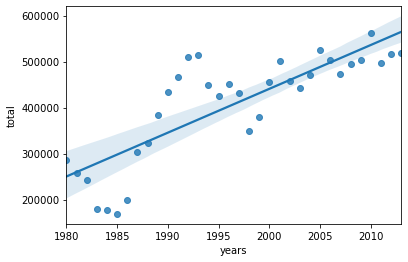

In [40]:
ax = sns.regplot(x="years", y="total", data = df_total_year)